In [12]:
# Data Processing
import pandas as pd
import json

# Visualising
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the JSON file
with open("C:/Users/nicol/results_test.json") as file:
    data = json.load(file)

# Convert the data to a pandas DataFrame
df = pd.json_normalize(data)

df.head()

,metadata.dataVersion,metadata.matchId,metadata.participants,info.frameInterval,info.frames,info.gameId,info.participants
0,2,EUW1_6509820843,[AcLf9dWLl5j7a5rmkExag8_NplEoxQaqXQbF7xv0Hj7qW...,60000,"[{'events': [{'realTimestamp': 1689946662539, ...",6509820843,"[{'participantId': 1, 'puuid': 'AcLf9dWLl5j7a5..."
1,2,EUW1_6509704311,[Hby05Whgg2cmrsSQZxVIe4sktiAW-bugAopsq6v4gkbld...,60000,"[{'events': [{'realTimestamp': 1689943609592, ...",6509704311,"[{'participantId': 1, 'puuid': 'Hby05Whgg2cmrs..."
2,2,EUW1_6509675026,[YVulfTo4u9yXSlFHTipwjlWco1iQvUB1JCISKscDSO0qP...,60000,"[{'events': [{'realTimestamp': 1689942709930, ...",6509675026,"[{'participantId': 1, 'puuid': 'YVulfTo4u9yXSl..."
3,2,EUW1_6509618670,[5C8tj95GNxs0EzXX9LOl4XPY6U1gMOzZiRxlG9Jlg0sz2...,60000,"[{'events': [{'realTimestamp': 1689940827689, ...",6509618670,"[{'participantId': 1, 'puuid': '5C8tj95GNxs0Ez..."
4,2,EUW1_6509578034,[4zNt4Ymh-0XXJUv6sOm9ouk412IUaJAdn8XQt-1MV7ZTD...,60000,"[{'events': [{'realTimestamp': 1689939713622, ...",6509578034,"[{'participantId': 1, 'puuid': '4zNt4Ymh-0XXJU..."


In [3]:
# Unpacking the 'info.frames' column into a separate DataFrame
frames_data = []

# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Loop over each frame in the 'info.frames' list
    for frame in row['info.frames']:
        # Add the frame data to the list, including the matchId for merging later
        frames_data.append({'matchId': row['metadata.matchId'], **frame})

# Convert the frames data to a DataFrame
df_frames = pd.json_normalize(frames_data)

df_frames.head()

,matchId,events,timestamp,participantFrames.1.championStats.abilityHaste,participantFrames.1.championStats.abilityPower,participantFrames.1.championStats.armor,participantFrames.1.championStats.armorPen,participantFrames.1.championStats.armorPenPercent,participantFrames.1.championStats.attackDamage,participantFrames.1.championStats.attackSpeed,...,participantFrames.10.goldPerSecond,participantFrames.10.jungleMinionsKilled,participantFrames.10.level,participantFrames.10.minionsKilled,participantFrames.10.participantId,participantFrames.10.position.x,participantFrames.10.position.y,participantFrames.10.timeEnemySpentControlled,participantFrames.10.totalGold,participantFrames.10.xp
0,EUW1_6509820843,"[{'realTimestamp': 1689946662539, 'timestamp':...",0,0,0,33,0,0,25,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUW1_6509820843,"[{'levelUpType': 'NORMAL', 'participantId': 2,...",60001,0,0,44,0,0,69,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUW1_6509820843,"[{'assistingParticipantIds': [7], 'bounty': 0,...",120001,0,0,48,0,0,71,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EUW1_6509820843,"[{'levelUpType': 'NORMAL', 'participantId': 8,...",180031,0,0,48,0,0,71,105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EUW1_6509820843,"[{'bounty': 0, 'killStreakLength': 2, 'killerI...",240039,0,0,81,0,0,77,109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Unpacking the 'events' column into a separate DataFrame
events_data = []

# Loop over each row in the DataFrame
for index, row in df_frames.iterrows():
    # Loop over each event in the 'events' list
    for event in row['events']:
        # Add the event data to the list, including the matchId and frame timestamp for merging later
        events_data.append({'matchId': row['matchId'], 'frameTimestamp': row['timestamp'], **event})

# Convert the events data to a DataFrame
df_events = pd.json_normalize(events_data)

df_events.head()

,matchId,frameTimestamp,realTimestamp,timestamp,type,level,participantId,levelUpType,skillSlot,itemId,...,winningTeam,killerTeamId,monsterSubType,monsterType,laneType,teamId,buildingType,towerType,actualStartTime,name
0,EUW1_6509820843,0,1.689947e+12,0,PAUSE_END,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUW1_6509820843,0,NaN,0,LEVEL_UP,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EUW1_6509820843,0,NaN,0,LEVEL_UP,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EUW1_6509820843,0,NaN,0,LEVEL_UP,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EUW1_6509820843,0,NaN,0,LEVEL_UP,2.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Unpacking the 'info.participants' column into a separate DataFrame
participants_data = []

# Loop over each row in the DataFrame
for index, row in df.iterrows():
    # Loop over each participant in the 'info.participants' list
    for participant in row['info.participants']:
        # Add the participant data to the list, including the matchId for merging later
        participants_data.append({'matchId': row['metadata.matchId'], **participant})

# Convert the participants data to a DataFrame
df_participants = pd.json_normalize(participants_data)

df_participants.head()

,matchId,participantId,puuid
0,EUW1_6509820843,1,AcLf9dWLl5j7a5rmkExag8_NplEoxQaqXQbF7xv0Hj7qWz...
1,EUW1_6509820843,2,xe6xp4n1-NFz1yyqIN0pHUwO7e1Hh2Q1eEx5Ou5pCr71zY...
2,EUW1_6509820843,3,kfNhLXTGFOeUv-TmMaWwFdYU_qCj43P7nzCjj4YOss3OsL...
3,EUW1_6509820843,4,22W3D7cc97FAh8snjsjomVEy5QnRz2J4Uvf_3RIpsf1Xs4...
4,EUW1_6509820843,5,5C8tj95GNxs0EzXX9LOl4XPY6U1gMOzZiRxlG9Jlg0sz2d...


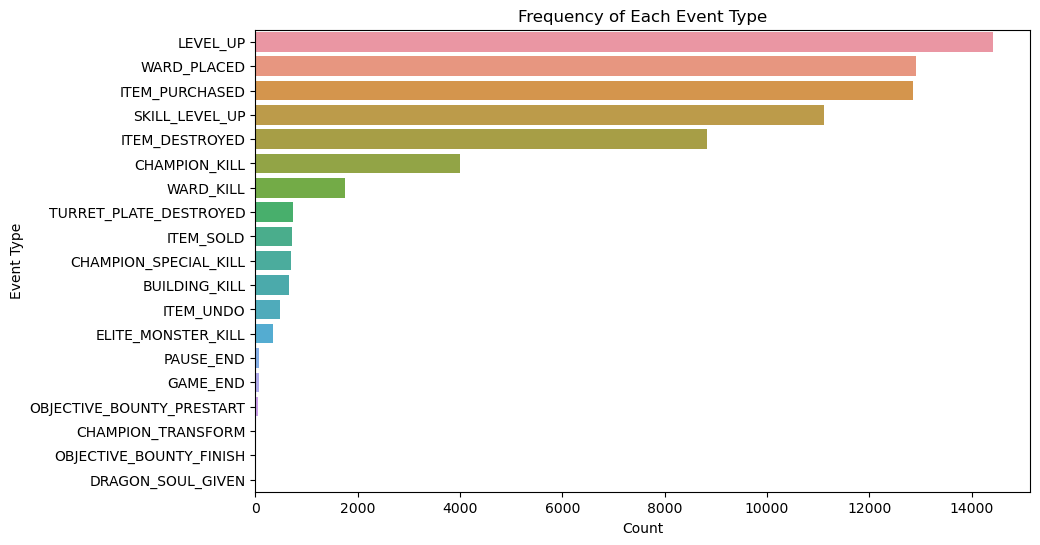

In [13]:
# Calculate the frequency of each event type
event_type_counts = df_events['type'].value_counts()

# Create a DataFrame from the counts for easier plotting
df_event_type_counts = pd.DataFrame({'EventType': event_type_counts.index, 'Count': event_type_counts.values})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='EventType', data=df_event_type_counts)
plt.title('Frequency of Each Event Type')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.show()

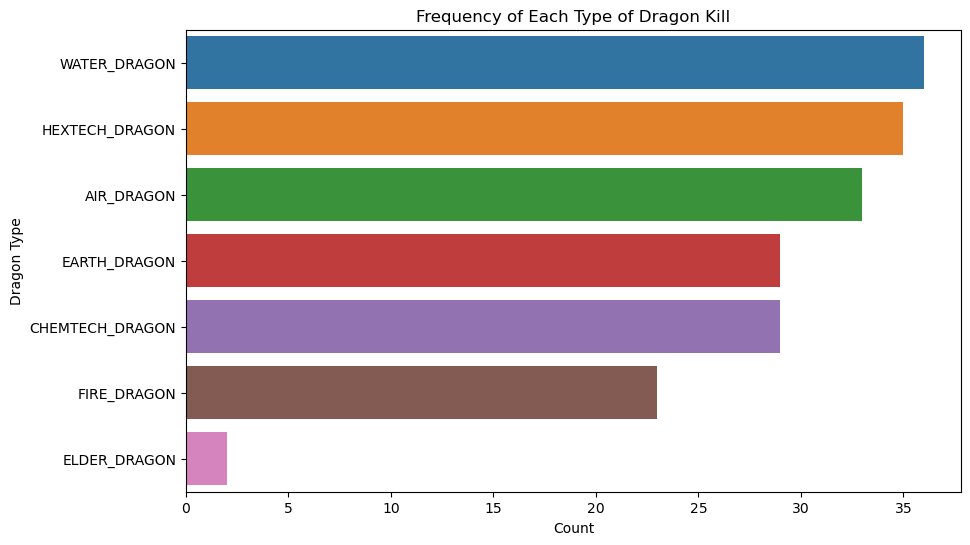

In [14]:
# Filter for dragon kill events
df_dragon_kills = df_events[(df_events['type'] == 'ELITE_MONSTER_KILL') & (df_events['monsterType'] == 'DRAGON')]

# Calculate the frequency of each type of dragon kill
dragon_kill_counts = df_dragon_kills['monsterSubType'].value_counts()

# Create a DataFrame from the counts for easier plotting
df_dragon_kill_counts = pd.DataFrame({'DragonType': dragon_kill_counts.index, 'KillCount': dragon_kill_counts.values})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='KillCount', y='DragonType', data=df_dragon_kill_counts)
plt.title('Frequency of Each Type of Dragon Kill')
plt.xlabel('Count')
plt.ylabel('Dragon Type')
plt.show()

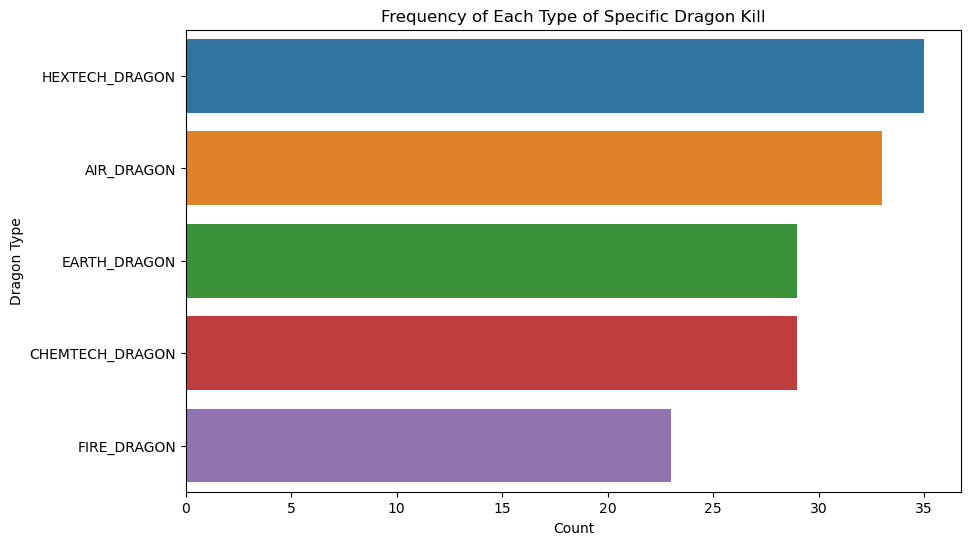

In [15]:
# List of dragon types to consider
dragon_types = ['FIRE_DRAGON', 'CHEMTECH_DRAGON', 'EARTH_DRAGON', 'AIR_DRAGON', 'HEXTECH_DRAGON']

# Filter for specific dragon types
df_specific_dragon_kills = df_dragon_kills[df_dragon_kills['monsterSubType'].isin(dragon_types)]

# Calculate the frequency of each type of dragon kill
specific_dragon_kill_counts = df_specific_dragon_kills['monsterSubType'].value_counts()

# Create a DataFrame from the counts for easier plotting
df_specific_dragon_kill_counts = pd.DataFrame({'DragonType': specific_dragon_kill_counts.index, 'KillCount': specific_dragon_kill_counts.values})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='KillCount', y='DragonType', data=df_specific_dragon_kill_counts)
plt.title('Frequency of Each Type of Specific Dragon Kill')
plt.xlabel('Count')
plt.ylabel('Dragon Type')
plt.show()

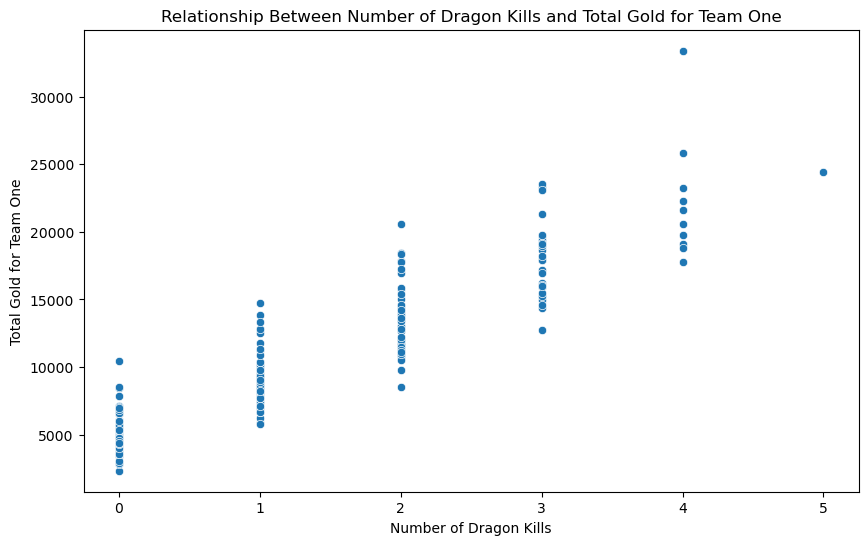

In [16]:
# Aggregate the total gold for 'teamOne' at each timestamp
df_frames['teamOneTotalGold'] = df_frames[[col for col in df_frames.columns if 'totalGold' in col and '.1' in col]].sum(axis=1)

# Merge the dragon kill events with the frames data based on the matchId and timestamp
df_dragon_kills_frames = pd.merge_asof(df_dragon_kills.sort_values('timestamp'), 
                                       df_frames.sort_values('timestamp'), 
                                       by='matchId', 
                                       on='timestamp')

# Calculate the cumulative number of dragon kills up to each frame
df_dragon_kills_frames['dragonKills'] = df_dragon_kills_frames.groupby('matchId').cumcount()

# Create a DataFrame with one row for each frame, including the total gold and the number of dragon kills
df_gold_dragon_kills = df_dragon_kills_frames[['matchId', 'timestamp', 'dragonKills', 'teamOneTotalGold']]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dragonKills', y='teamOneTotalGold', data=df_gold_dragon_kills)
plt.title('Relationship Between Number of Dragon Kills and Total Gold for Team One')
plt.xlabel('Number of Dragon Kills')
plt.ylabel('Total Gold for Team One')
plt.show()